In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
CustomerID = np.array([1, 2, 3, 4, 5, 5, 6, 7, 8, 9])
Satisfaction = np.array([8, 7, np.nan, 9, 6, 6, 10, 4, 5, 7])
Satisfaction_mean=np.nanmean(Satisfaction)
Satisfaction[np.isnan(Satisfaction)] = Satisfaction_mean
print(Satisfaction)
Customer_data_arr = np.column_stack((CustomerID, Satisfaction))
Customer_data_df = pd.DataFrame(Customer_data_arr, columns=['Customer_ID','Satisfaction'])
Customer_data_df
# Descriptive analysis 
from Univariate import Univariate
quan,qual = Univariate.quanqual(Customer_data_df)
print(quan,qual)
descriptive = Univariate.univariate(Customer_data_df,quan)
descriptive


[ 8.          7.          6.88888889  9.          6.          6.
 10.          4.          5.          7.        ]
['Customer_ID', 'Satisfaction'] []


,Customer_ID,Satisfaction
Mean,5.0,6.888889
Median,5.0,6.944444
Mode,5.0,6.0
Q1:25%,3.25,6.0
Q2:50%,5.0,6.944444
Q3:75%,6.75,7.75
99%,8.91,9.91
Q4:100%,9.0,10.0
IQR,3.5,1.75
1.5rule,5.25,2.625


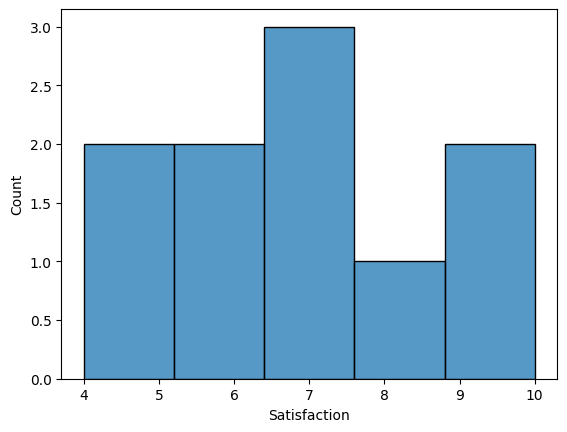

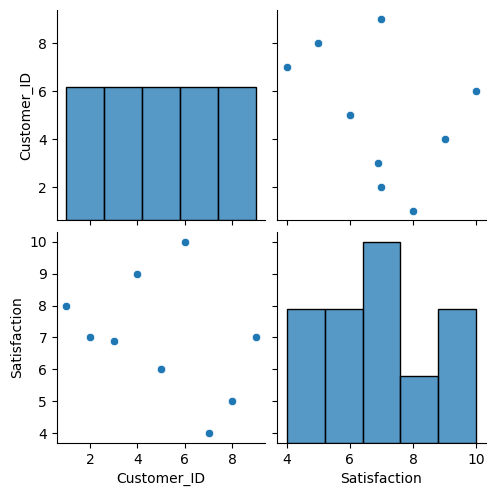

<Axes: >

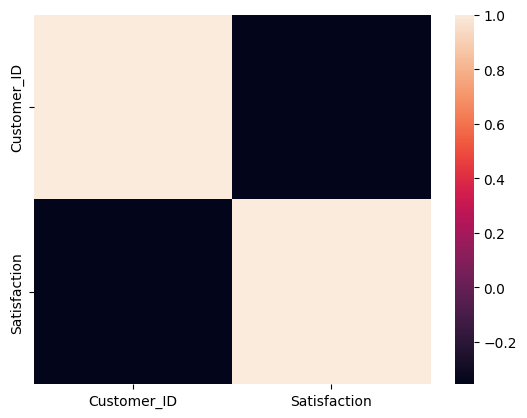

In [25]:
# plots for analysis
sns.histplot(data=Customer_data_df, x='Satisfaction')
plt.show()
sns.pairplot(Customer_data_df)
plt.show()
corr_value=Customer_data_df.corr(numeric_only=True)
sns.heatmap(corr_value)

In [ ]:
Question 2 :
 A retail store has recorded monthly sales data for its products. How can Data Science concepts be applied to understand sales performance?
SampleDataset:
'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
 'Sales': [1500, 1700, 1600, 1800, 2200, 2100]





<Axes: xlabel='Month', ylabel='Sales'>

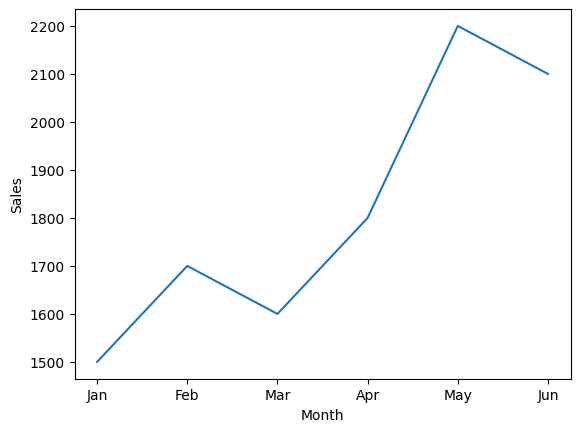

In [3]:
import pandas as pd
import seaborn as sns
Retail_store_data={'Month':['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
                   'Sales': [1500, 1700, 1600, 1800, 2200, 2100]}
retail_store_df = pd.DataFrame(Retail_store_data)
retail_store_df
sns.lineplot(data=retail_store_df, x='Month', y='Sales')
# as per the below line plot its clearly states that the performance is getting increased gradually from jan to feb and then decreases in march
# and then increases further till may and then decrease lightly in june
# overall sales performance is quite good in most of the months as per below graph

In [ ]:
Question 3:
A hospital conducted a study to check the effectiveness of a new medical test. How can Data Science concepts be used to validate its results?
SampleDataset:
group_a = [110, 115, 108, 102, 107]
group_b = [120, 125, 130, 122, 128]
Expected Output:
T-Statistic: -5.92, P-Value: 0.0004
Reject Null Hypothesis: The test is effective.







In [4]:
from scipy.stats import ttest_ind
group_a = [110, 115, 108, 102, 107]
group_b = [120, 125, 130, 122, 128]
t_stat, p_val = ttest_ind(group_a, group_b)
print(f"T-Statistic: {t_stat:.2f}, P-value:{p_val:.4f}")
if(p_val<0.05):
    print("Reject Null Hypothesis: The test is effective.")
else:
    print("Accept Null Hypothesis: The test is not effective.")

T-Statistic: -5.92, P-value:0.0004
Reject Null Hypothesis: The test is effective.


In [ ]:
Question 4:
 A company wants to evaluate employee performance using various metrics. How can Data Science concepts be applied?
Sample Dataset:
    'Department': ['HR', 'IT', 'Sales', 'IT', 'HR', 'Sales', np.nan, 'HR', 'Sales', 'IT'],
    'Experience (Years)': [1.0, 3.0, 5.0, np.nan, 10.0, 2.0, 8.0, 4.0, np.nan, 9.0],
    'Projects Completed': [2.0, 5.0, np.nan, 10.0, 12.0, 3.0, 9.0, np.nan, 14.0, 11.0],
    'Performance Rating': [3.0, np.nan, 7.0, 8.0, 9.0, 4.0, 8.0, 7.0, 10.0, np.nan]

Perform:
1)	Data Cleaning
2)	Descriptive Statistics
3)	Correlation Analysis (Using heatmap)
4)	Distribution Analysis (Plot Histogram)
5)	Performance Comparison (Using Boxplot)
6)	Experience vs Performance (Perform Bivariate Analysis using a scatter plot)
7)	Department-wise Analysis



## 1) Data Cleaning

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
Data = {'Department': ['HR', 'IT', 'Sales', 'IT', 'HR', 'Sales', np.nan, 'HR', 'Sales', 'IT'],
             'Experience (Years)': [1.0, 3.0, 5.0, np.nan, 10.0, 2.0, 8.0, 4.0, np.nan, 9.0],
             'Projects Completed': [2.0, 5.0, np.nan, 10.0, 12.0, 3.0, 9.0, np.nan, 14.0, 11.0],
             'Performance Rating': [3.0, np.nan, 7.0, 8.0, 9.0, 4.0, 8.0, 7.0, 10.0, np.nan]}
employee_df = pd.DataFrame(Data)
employee_df
employee_df["Department"].fillna(employee_df['Department'].mode()[0], inplace=True)
employee_df
employee_df.fillna({'Experience (Years)':employee_df['Experience (Years)'].median(),
                                       'Projects Completed':employee_df['Projects Completed'].median(),
                                       'Perfomance Rating':employee_df['Performance Rating'].median()}, inplace=True)

employee_df["Performance Rating"].fillna(employee_df["Performance Rating"].median(), inplace=True)
employee_df


['Experience (Years)', 'Projects Completed', 'Performance Rating'] ['Department']


C:\Users\Inst_\AppData\Local\Temp\ipykernel_18568\3832162501.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee_df["Department"].fillna(employee_df['Department'].mode()[0], inplace=True)
C:\Users\Inst_\AppData\Local\Temp\ipykernel_18568\3832162501.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

,Experience (Years),Projects Completed,Performance Rating
Mean,5.1,8.5,7.1
Median,4.5,9.5,7.5
Mode,4.5,9.5,7.0
Q1:25%,3.25,6.0,7.0
Q2:50%,4.5,9.5,7.5
Q3:75%,7.25,10.75,8.0
99%,9.91,13.82,9.91
Q4:100%,10.0,14.0,10.0
IQR,4.0,4.75,1.0
1.5rule,6.0,7.125,1.5


## 2)Descriptive Statistics

In [13]:
from Univariate import Univariate 
quan, qual = Univariate.quanqual(employee_df)
print(quan,qual)
descriptive = Univariate.univariate(employee_df,quan)
descriptive


['Experience (Years)', 'Projects Completed', 'Performance Rating'] ['Department']


,Experience (Years),Projects Completed,Performance Rating
Mean,5.1,8.5,7.1
Median,4.5,9.5,7.5
Mode,4.5,9.5,7.0
Q1:25%,3.25,6.0,7.0
Q2:50%,4.5,9.5,7.5
Q3:75%,7.25,10.75,8.0
99%,9.91,13.82,9.91
Q4:100%,10.0,14.0,10.0
IQR,4.0,4.75,1.0
1.5rule,6.0,7.125,1.5


## 3) Correlation Analysis (Using heatmap)



 Correlation heat map


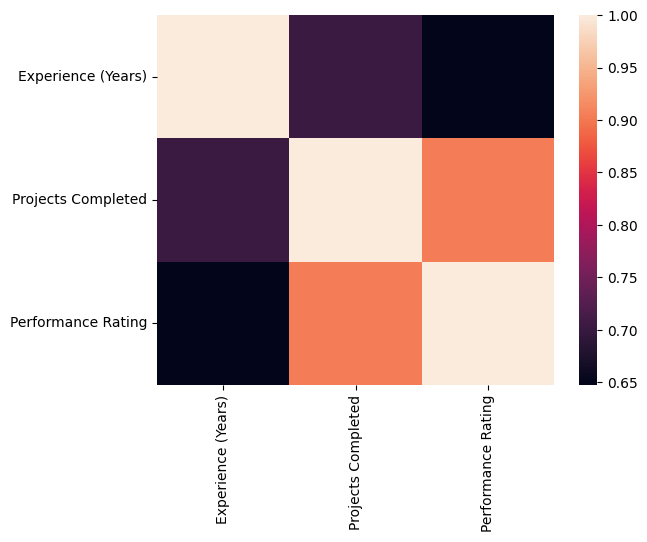

In [7]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt
corr_value = employee_df.corr(numeric_only=True)
sns.heatmap(data=corr_value)
print("\n Correlation heat map")
plt.show()


## 4)Distribution Analysis (Plot Histogram)


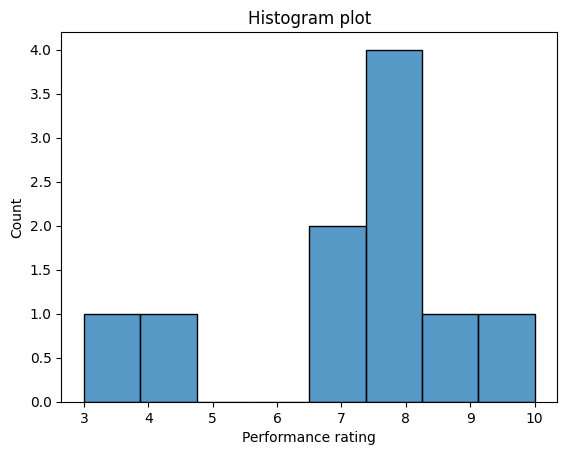

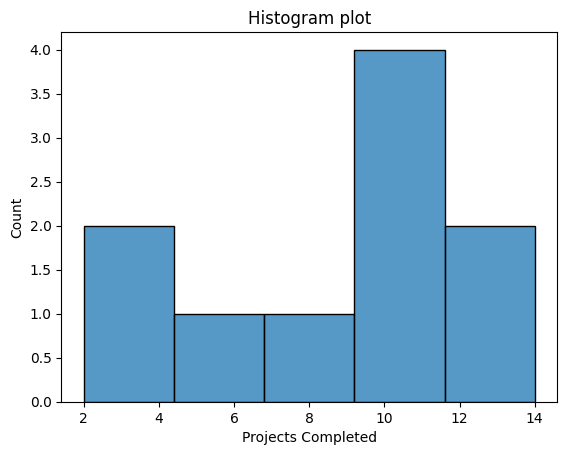

In [8]:
# Distribution analysis(Histogram)
sns.histplot(data=employee_df, x="Performance Rating")
plt.xlabel("Performance rating")
plt.title("Histogram plot")
plt.show()
sns.histplot(data=employee_df, x="Projects Completed")
plt.xlabel("Projects Completed")
plt.title("Histogram plot")
plt.show()


## 5)Performance Comparison (Using Boxplot)



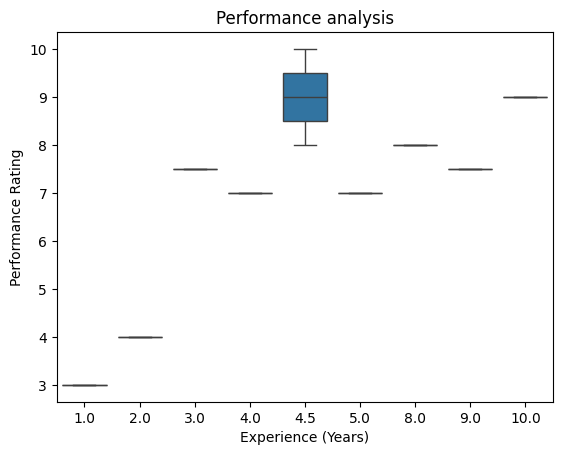

In [17]:
# performance analysis(Box plot)
sns.boxplot(data=employee_df, x='Experience (Years)', y='Performance Rating')
plt.title('Performance analysis')
plt.show()


## 6)	Experience vs Performance (Perform Bivariate Analysis using a scatter plot)


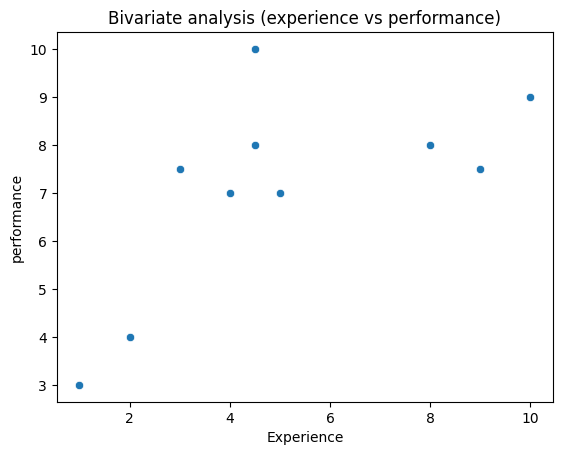

In [11]:
# experience vs performance
sns.scatterplot(data=employee_df, x='Experience (Years)', y='Performance Rating')
plt.title('Bivariate analysis (experience vs performance)')
plt.xlabel('Experience')
plt.ylabel('performance')
plt.show()

## 7)	Department-wise Analysis

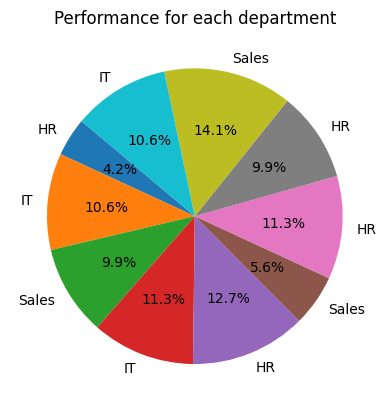

In [20]:
department=employee_df['Department']
ratings=employee_df['Performance Rating']
plt.pie(ratings, labels=department,autopct='%1.1f%%', startangle=140)
plt.title('Performance for each department')
plt.show()
# as per the below chart sales department performed well compared to others